Need data files "exp3a_data.csv" and "exp3b_data.csv"

# Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.patches import Patch

# Process Data

In [2]:
data3a = pd.read_csv('exp3a_data.csv')
data3b = pd.read_csv('exp3b_data.csv')

In [3]:
data3a["condition"] = data3a["shape"] + "_" + data3a["changeType"]
data3b["condition"] = data3b["shape"] + "_" + data3b["changeType"]

In [4]:
data3a.head()

,shape,changeType,blockNum,trialID,response,confidence,rt,experimentVersion,correctAnswer,fullShapeName,responded_correctly,analysisChangeType,subject,condition
0,shape3,no_change2,0,0,same,9,9077.0,v001,same,shape3_no_change2,1,none,1,shape3_no_change2
1,shape1,no_change1,0,1,same,9,3606.0,v001,same,shape1_no_change1,1,none,1,shape1_no_change1
2,shape5,no_change3,0,2,same,8,2494.0,v001,same,shape5_no_change3,1,none,1,shape5_no_change3
3,shape6,no_change1,0,3,same,8,4671.0,v001,same,shape6_no_change1,1,none,1,shape6_no_change1
4,shape2,no_change2,0,4,same,8,2797.0,v001,same,shape2_no_change2,1,none,1,shape2_no_change2


In [5]:
data3b.head()

,shape,changeType,blockNum,trialID,response,confidence,rt,experimentVersion,correctAnswer,fullShapeName,responded_correctly,analysisChangeType,subject,condition
0,shape6,no_change1,0,0,same,8,5088.3,control,same,shape6_no_change1,1,none,1,shape6_no_change1
1,catch_shape,change1,0,1,different,9,3265.9,control,different,catch_shape_change1,1,none,1,catch_shape_change1
2,shape4,no_change1,0,2,same,9,2182.2,control,same,shape4_no_change1,1,none,1,shape4_no_change1
3,shape5,no_change4,0,3,same,9,3093.5,control,same,shape5_no_change4,1,none,1,shape5_no_change4
4,shape1,no_change4,0,4,same,9,1870.6,control,same,shape1_no_change4,1,none,1,shape1_no_change4


In [6]:
# replace string value by binary value
data3a["response"].replace(to_replace="same", value=0, inplace=True)
data3a["response"].replace(to_replace="different", value=1, inplace=True)
data3b["response"].replace(to_replace="same", value=0, inplace=True)
data3b["response"].replace(to_replace="different", value=1, inplace=True)

In [7]:
data3a.shape, data3b.shape

((6048, 14), (5400, 14))

In [8]:
# exclude catch and no_change trials
data3a = data3a[data3a["condition"].str.contains("catch")==False]
data3a = data3a[data3a["condition"].str.contains("no_change")==False]

data3b = data3b[data3b["condition"].str.contains("catch")==False]
data3b = data3b[data3b["condition"].str.contains("no_change")==False]

In [9]:
data3a.groupby(["condition"])["response"].mean()[:10]

condition
shape1_concave_area1           0.553571
shape1_concave_area2           0.785714
shape1_concave_nofill_area1    0.642857
shape1_concave_nofill_area2    0.678571
shape1_convex_area1            0.732143
shape1_convex_area2            0.821429
shape2_concave_area1           0.821429
shape2_concave_area2           0.785714
shape2_concave_nofill_area1    0.928571
shape2_concave_nofill_area2    0.678571
Name: response, dtype: float64

In [10]:
data3b.groupby(["condition"])["response"].mean()[:10]

condition
shape1_concave_area1           0.68
shape1_concave_area2           0.86
shape1_concave_nofill_area1    0.78
shape1_concave_nofill_area2    0.60
shape1_convex_area1            0.88
shape1_convex_area2            0.94
shape2_concave_area1           0.84
shape2_concave_area2           0.98
shape2_concave_nofill_area1    1.00
shape2_concave_nofill_area2    0.88
Name: response, dtype: float64

In [11]:
df3a = pd.DataFrame(data3a.groupby(["condition"])["response"].mean()).reset_index()
df3b = pd.DataFrame(data3b.groupby(["condition"])["response"].mean()).reset_index()

In [12]:
df3a.head()

,condition,response
0,shape1_concave_area1,0.553571
1,shape1_concave_area2,0.785714
2,shape1_concave_nofill_area1,0.642857
3,shape1_concave_nofill_area2,0.678571
4,shape1_convex_area1,0.732143


In [13]:
df3b.head()

,condition,response
0,shape1_concave_area1,0.68
1,shape1_concave_area2,0.86
2,shape1_concave_nofill_area1,0.78
3,shape1_concave_nofill_area2,0.60
4,shape1_convex_area1,0.88


In [14]:
# Extract percentage of noticing change in each condition in exp 3a and 3b
print(df3a[df3a['condition'].str.contains("concave_area")==True])
concave3a = df3a[df3a['condition'].str.contains("concave_area")==True]["response"].to_numpy() * 100
convex3a = df3a[df3a['condition'].str.contains("convex_area")==True]["response"].to_numpy() * 100
nofill3a = df3a[df3a['condition'].str.contains("concave_nofill_area")==True]["response"].to_numpy() * 100

print(df3b[df3b['condition'].str.contains("concave_area")==True])
concave3b = df3b[df3b['condition'].str.contains("concave_area")==True]["response"].to_numpy() * 100
convex3b = df3b[df3b['condition'].str.contains("convex_area")==True]["response"].to_numpy() * 100
nofill3b = df3b[df3b['condition'].str.contains("concave_nofill_area")==True]["response"].to_numpy() * 100

               condition  response
0   shape1_concave_area1  0.553571
1   shape1_concave_area2  0.785714
6   shape2_concave_area1  0.821429
7   shape2_concave_area2  0.785714
12  shape3_concave_area1  0.267857
13  shape3_concave_area2  0.482143
18  shape4_concave_area1  0.410714
19  shape4_concave_area2  0.946429
24  shape5_concave_area1  0.464286
25  shape5_concave_area2  0.625000
30  shape6_concave_area1  0.410714
31  shape6_concave_area2  0.607143
36  shape7_concave_area1  0.303571
37  shape7_concave_area2  0.607143
42  shape8_concave_area1  0.428571
43  shape8_concave_area2  0.660714
               condition  response
0   shape1_concave_area1      0.68
1   shape1_concave_area2      0.86
6   shape2_concave_area1      0.84
7   shape2_concave_area2      0.98
12  shape3_concave_area1      0.38
13  shape3_concave_area2      0.50
18  shape4_concave_area1      0.86
19  shape4_concave_area2      0.94
24  shape5_concave_area1      0.56
25  shape5_concave_area2      0.84
30  shape6_concave_a

In [15]:
assert len(concave3a) == len(concave3b)
assert len(convex3a) == len(convex3b)
assert len(nofill3a) == len(nofill3b)

# Compare Percentage of Noticing Change

In [18]:
def significance(pvalue):
  # labeling significance level by p value
  if pvalue < 0.001:
    return '***'
  elif pvalue < 0.01:
    return '**'
  elif pvalue < 0.05:
    return '*'
  else:
    return 'NS'

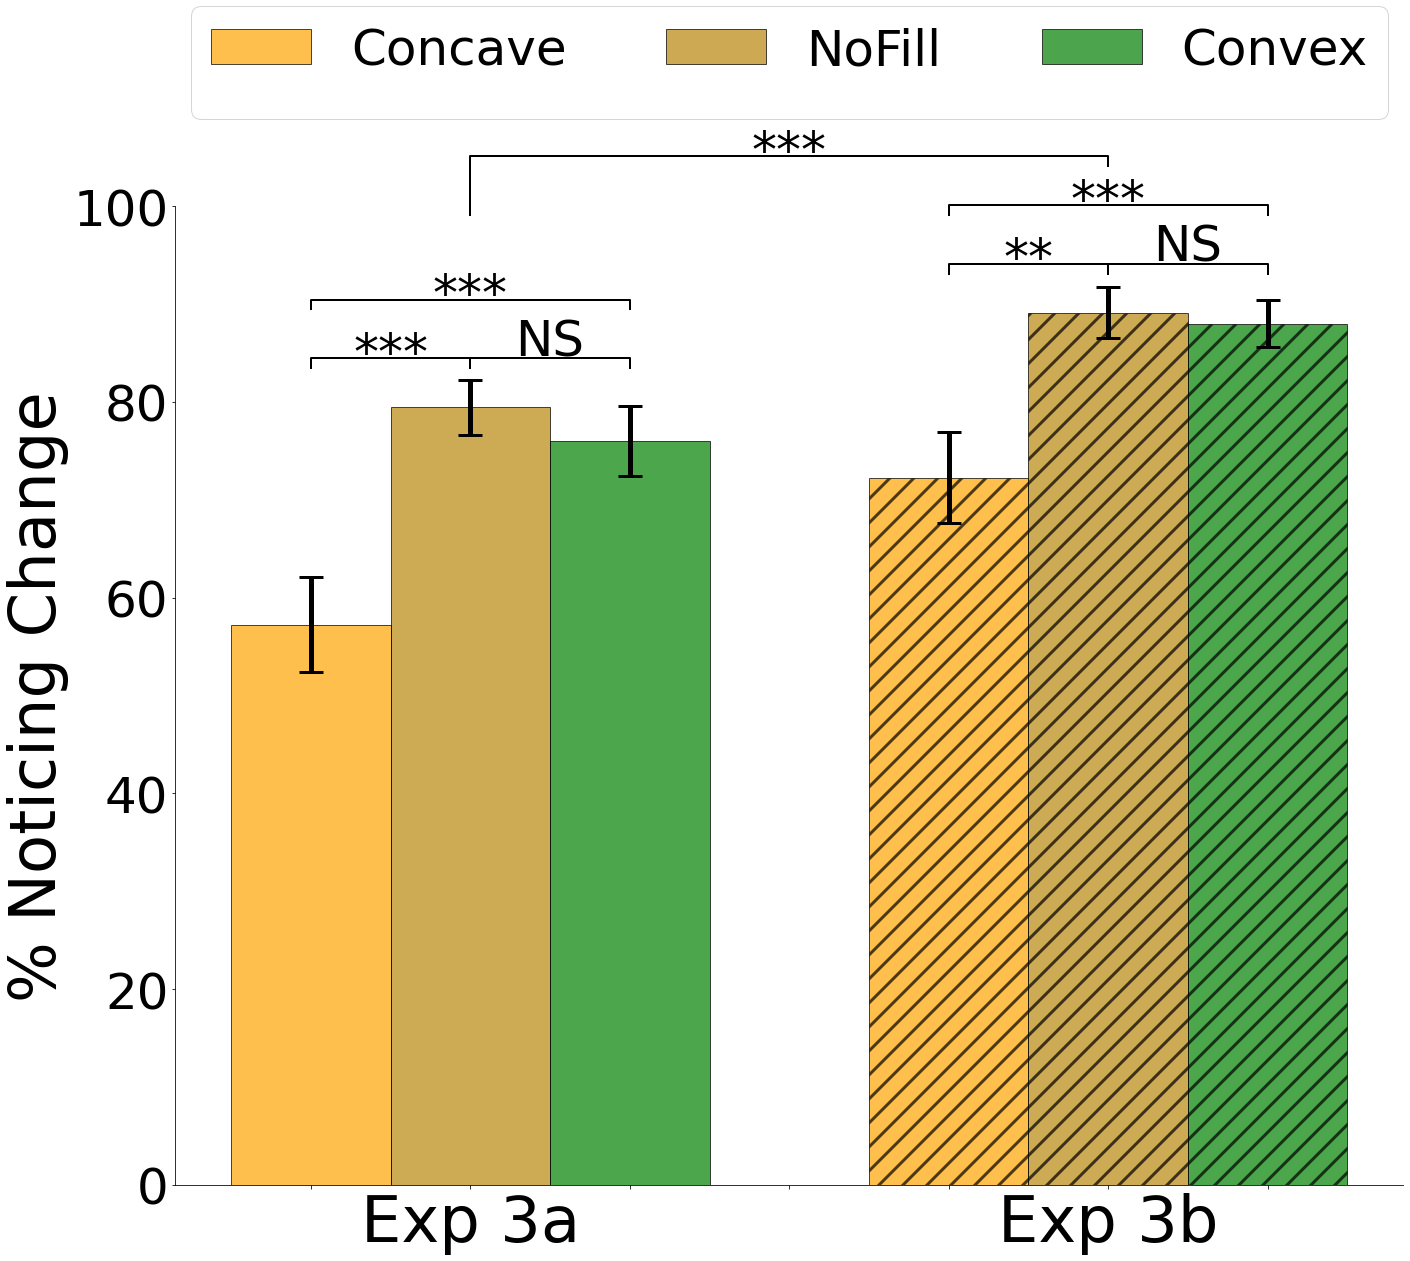

In [19]:
_, ax = plt.subplots(1,1, figsize=(22, 18))
LABELFONT = 64
TICKFONT = 50
LEGENDFONT = 50

# Plot exp 3a data
ax.bar(0, concave3a.mean(), 1, 
       yerr = [stats.sem(concave3a)],
       error_kw=dict(lw=5, capsize=12, capthick=3),
       alpha=0.7, color='orange', edgecolor='k', 
       label='Concave')
ax.bar(1, nofill3a.mean(), 1, 
       yerr = [stats.sem(nofill3a)],
       error_kw=dict(lw=5, capsize=12, capthick=3),
       alpha=0.7, color='darkgoldenrod', edgecolor='k', 
       label='NoFill')
ax.bar(2, convex3a.mean(), 1, 
       yerr = [stats.sem(convex3a)],
       error_kw=dict(lw=5, capsize=12, capthick=3),
       alpha=0.7, color='green', edgecolor='k', 
       label='Convex')

# Plot exp 3b data
plt.rcParams['hatch.linewidth'] = 3
ax.bar(4, concave3b.mean(), 1, 
       yerr = [stats.sem(concave3b)],
       error_kw=dict(lw=5, capsize=12, capthick=3),
       alpha=0.7, color='orange', edgecolor='k', 
       hatch='/')
ax.bar(5, nofill3b.mean(), 1, 
       yerr = [stats.sem(nofill3b)],
       error_kw=dict(lw=5, capsize=12, capthick=3),
       alpha=0.7, color='darkgoldenrod', edgecolor='k', 
       hatch='/')
ax.bar(6, convex3b.mean(), 1, 
       yerr = [stats.sem(convex3b)], 
       error_kw=dict(lw=5, capsize=12, capthick=3),
       alpha=0.7, color='green', edgecolor='k', 
       hatch='/')


# Annotate paired t-test results across conditions in exp 3a
x1, x2, y, h = 0, 1, nofill3a.mean()+4, 1
sig = significance(stats.ttest_rel(concave3a, nofill3a)[1])
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=2, c='k')
ax.text((x1+x2)*.5, y-h, sig, ha='center', va='bottom', color='k', fontsize=TICKFONT)
x1, x2, y, h = 1, 2, nofill3a.mean()+4, 1
sig = significance(stats.ttest_rel(nofill3a, convex3a)[1])
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=2, c='k')
ax.text((x1+x2)*.5, y+h*0.3, sig, ha='center', va='bottom', color='k', fontsize=TICKFONT)
x1, x2, y, h = 0, 2, nofill3a.mean()+10, 1
sig = significance(stats.ttest_rel(concave3a, convex3a)[1])
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=2, c='k')
ax.text((x1+x2)*.5, y-h, sig, ha='center', va='bottom', color='k', fontsize=TICKFONT)

# Annotate paired t-test results across conditions in exp 3b
x1, x2, y, h = 4, 5, nofill3b.mean()+4, 1
sig = significance(stats.ttest_rel(concave3b, nofill3b)[1])
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=2, c='k')
ax.text((x1+x2)*.5, y-h, sig, ha='center', va='bottom', color='k', fontsize=TICKFONT)
x1, x2, y, h = 5, 6, nofill3b.mean()+4, 1
sig = significance(stats.ttest_rel(nofill3b, convex3b)[1])
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=2, c='k')
ax.text((x1+x2)*.5, y+h*0.3, sig, ha='center', va='bottom', color='k', fontsize=TICKFONT)
x1, x2, y, h = 4, 6, nofill3b.mean()+10, 1
sig = significance(stats.ttest_rel(concave3b, convex3b)[1])
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=2, c='k', clip_on=False)
ax.text((x1+x2)*.5, y-h, sig, ha='center', va='bottom', color='k', fontsize=TICKFONT)

# Annotate significance level of comparison between 3a and 3b (see the R code for logistic ANOVA)
x1, x2, y, h = 1, 5, nofill3b.mean()+15, 1
sig = significance(0.0009) # some arbitrary value p<.001
ax.plot([x1, x1, x2, x2], [y-5*h, y+h, y+h, y], lw=2, c='k', clip_on=False)
ax.text((x1+x2)*.5, y-h, sig, ha='center', va='bottom', color='k', fontsize=TICKFONT)


# Plotting
ax.set_ylabel('% Noticing Change', fontsize=LABELFONT)
ax.set_xticks(np.arange(7))
ax.set_xticklabels(['', 'Exp 3a', '', '', '', 'Exp 3b', ''], fontsize=LABELFONT)
ax.tick_params(axis='x', labelsize=LABELFONT)
ax.set_ylim(0, 100)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.yticks(fontsize=TICKFONT)
# make legend
legend_elements = [Patch(facecolor='orange', edgecolor='k', alpha=0.7, label='Concave'),
                   Patch(facecolor='darkgoldenrod', edgecolor='k', alpha=0.7, label='NoFill'),
                   Patch(facecolor='green', edgecolor='k', alpha=0.7, label='Convex'),]
leg1 = plt.legend(handles=legend_elements[:3], ncol=3, loc="upper center", fontsize=LEGENDFONT, bbox_to_anchor=(0.5, 1.23))
plt.gca().add_artist(leg1)
leg2 = plt.legend(handles=legend_elements[3:], ncol=3, loc="upper center", fontsize=LEGENDFONT, bbox_to_anchor=(0.5, 1.4))
leg2.remove()
leg1._legend_box._children.append(leg2._legend_handle_box)
leg1._legend_box.stale = True